# Sentiment Analysis on *Twitter Dataset*

## Importing libraries

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing dataset

In [44]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


## Exploratory Data Analysis

In [45]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [46]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [47]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [48]:
# Check positive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [49]:
# Check negative comments from the train set 

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [50]:
# add column for length of tweets

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


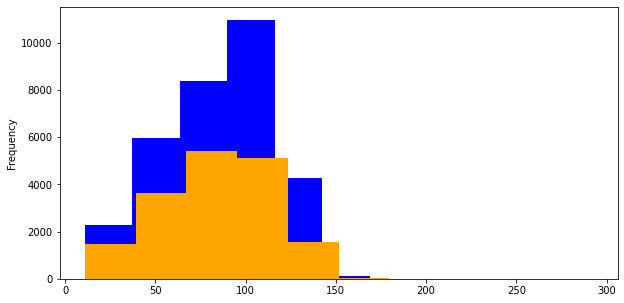

In [51]:
# Plot the distributions for length of tweets in the train and test data

length_train = train['len'].plot.hist(color = 'blue', figsize = (10, 5))
length_test = test['len'].plot.hist(color = 'orange', figsize = (10, 5))

In [52]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

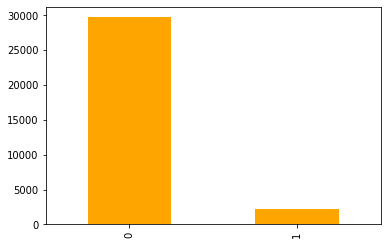

In [53]:
train['label'].value_counts().plot.bar(color = 'orange', figsize = (6, 4))

Text(0.5, 1.0, 'Top 20 Most Frequently Occuring Words')

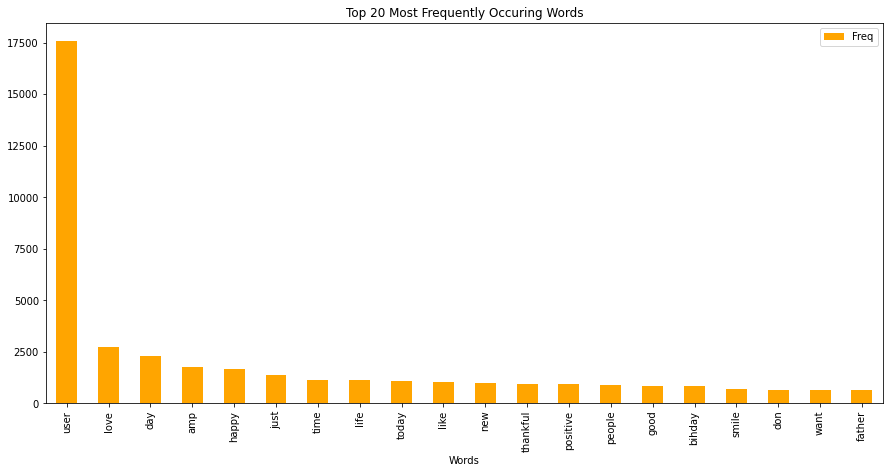

In [54]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['Words', 'Freq'])

frequency.head(20).plot(x='Words', y='Freq', kind='bar', figsize=(15, 7), color = 'orange')
plt.title("Top 20 Most Frequently Occuring Words")


## WordCloud representations

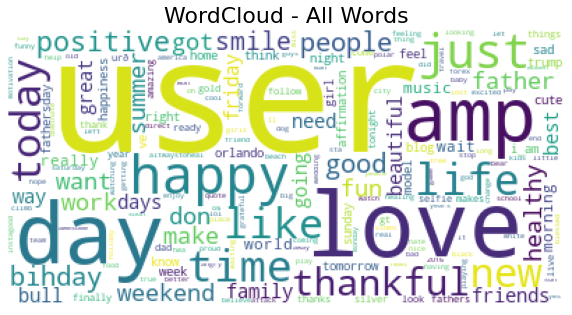

In [55]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud - All Words", fontsize = 22)
plt.show()

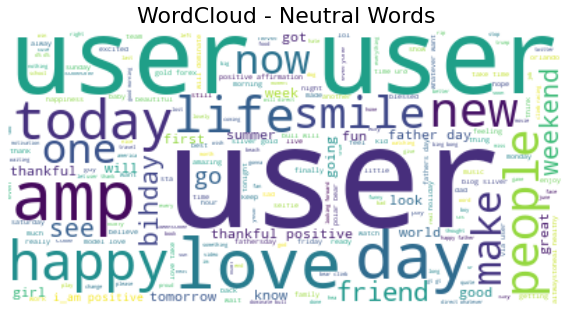

In [56]:
neutral_words =' '.join([text for text in train['tweet'][train['label'] == 0]])
wordcloud = WordCloud(background_color = 'white').generate(neutral_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud - Neutral Words", fontsize = 22)
plt.show()

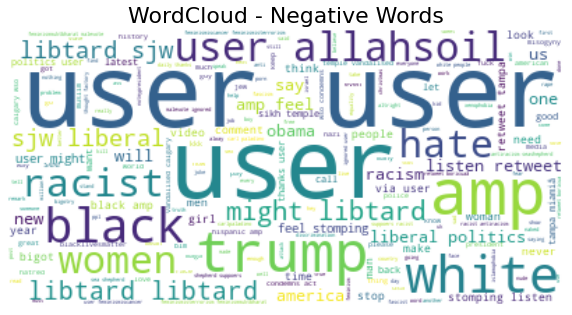

In [57]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(background_color = 'white').generate(negative_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud - Negative Words", fontsize = 22)
plt.show()


## Collecting the hashtags

In [58]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [59]:
# extract hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extract hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnest list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

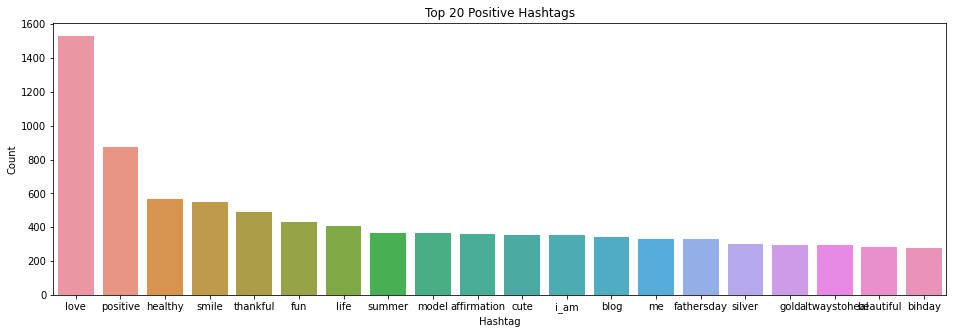

In [60]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# Plot top 20 most frequent positive hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count").set(title='Top 20 Positive Hashtags')
plt.show()

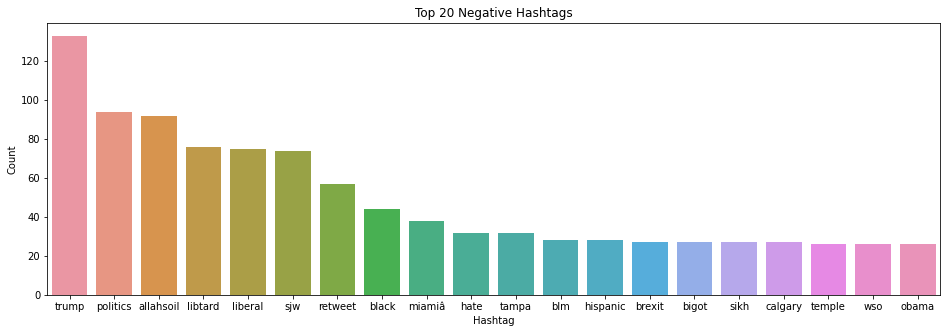

In [61]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# Plot top 20 most frequent negative hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count").set(title='Top 20 Negative Hashtags')
plt.show()

## Tokenization and word embedding

In [62]:
# tokenizing the words present in the training set
tokenized_tweets = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweets,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweets, total_examples= len(train['tweet']), epochs=20)

(6109467, 8411580)

In [63]:
model_w2v.wv.most_similar(positive = "love")

[('ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98»ð\x9f\x98»',
  0.44044405221939087),
 ('youuu!!!!', 0.43232083320617676),
 ('much!!', 0.42979294061660767),
 ('hu.', 0.42901837825775146),
 ('human!', 0.42890965938568115),
 ('kisses', 0.42557239532470703),
 ('pills', 0.42352432012557983),
 ('#smile#love', 0.4223128855228424),
 ('granted.', 0.4222521483898163),
 ('temporary', 0.42167234420776367)]

In [64]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', -0.003966018557548523),
 ('#yay', -0.028598882257938385),
 ('#hype', -0.044318556785583496),
 ('seeks', -0.045058272778987885),
 ('#tech', -0.054188914597034454),
 ('#gym', -0.055721838027238846),
 ('currently', -0.06749716401100159),
 ('excited', -0.06751212477684021),
 ('#fitness', -0.06752489507198334),
 ('ð\x9f\x98\x81', -0.07147674262523651)]

In [65]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [66]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweets)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

## Stopwords removal and Stemming train data

In [67]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # join back with space
  review = ' '.join(review)
  train_corpus.append(review)

## Stopwords removal and Stemming test data

In [68]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # join back with space
  review = ' '.join(review)
  test_corpus.append(review)

## Bag of Words

In [69]:
# create bag of words for training data
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [70]:
# create bag of words for testing data

cv = CountVectorizer(max_features = 2500)
X_test = cv.fit_transform(test_corpus).toarray()

print(X_test.shape)

(17197, 2500)


## Splitting dataset

In [71]:
# split the training data into training and validation sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25569, 2500)
(6393, 2500)
(25569,)
(6393,)


# Feature Scaling

In [72]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# XG Boost Classifier Training

In [73]:
cl_xgboost = XGBClassifier()
cl_xgboost.fit(X_train, y_train)

y_pred = cl_xgboost.predict(X_test)

## Evaluate Accuracy, Confusion Matrix and F1 score

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [75]:
print(accuracy_score(y_test, y_pred))

0.9438448302831222


In [76]:
print(confusion_matrix(y_test, y_pred))

[[5941    8]
 [ 351   93]]


In [77]:
print(f1_score(y_test, y_pred))

0.34128440366972473
